# Implementasi K-NN UTS

Algoritma KNN atau K-Nearest Neighbor adalah salah satu algoritma yang banyak digunakan di dunia machine learning untuk kasus klasifikasi.

Seperti yang telah disebutkan, algoritma KNN merupakan algoritma klasifikasi yang bekerja dengan mengambil sejumlah K data terdekat (tetangganya) sebagai acuan untuk menentukan kelas dari data baru. Algoritma ini mengklasifikasikan data berdasarkan similarity atau kemiripan atau kedekatannya terhadap data lainnya.

Dalam K-Nearest Neighbor, data point yang berada berdekatan disebut “neighbor” atau  “tetangga”.

## Data yang digunakan

*   Dataset [Breast Cancer Coimbra](https://raw.githubusercontent.com/ThreeYas/Breast-Cancer-Coimbra-Dataset/main/dataR2.csv)


##Informasi Dataset

* Ada 10 prediktor, semuanya kuantitatif, dan variabel dependen biner, yang menunjukkan ada tidaknya kanker payudara.

* Prediktor adalah data antropometrik dan parameter yang dapat dikumpulkan dalam analisis darah rutin.

* Model prediksi berdasarkan prediktor tersebut, jika akurat, berpotensi dapat digunakan sebagai biomarker kanker payudara.

## Informasi Atribut

Quantitative Attributes:


*   Age (Tahun)
*   BMI (kg/m2)
*   Glucose (mg/dL)
*   Insulin (µU/mL)
*   HOMA
*   Leptin (ng/mL)
*   Adiponectin (µg/mL)
*   Resistin (ng/mL)
*   MCP-1(pg/dL)

Labels


*   1=Healthy controls
*   2=Patients



In [ ]:
# mengimpor paket pandas kemudian diberi nama alias pd
import pandas as pd
# untuk menghilangkan warning
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [ ]:
# membaca dataset csv dari url
url = 'https://raw.githubusercontent.com/ThreeYas/Breast-Cancer-Coimbra-Dataset/main/dataR2.csv'
data = pd.read_csv(url)

In [ ]:
#periksa baris dan kolom dalam kumpulan data
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#mengecek ada berapa kolom dan berapa baris di dalam dataset
data.shape

(116, 10)

In [ ]:
# memisahkan data classification
x = data.iloc[:, :-1]
y = data.loc[:, "Classification"]
y = data["Classification"].values

In [ ]:
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# membagi data menjadi set train dan test (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

### KNN Library python sklearn.neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
x_new = [[20,35,79,4,0.2,22,31,3.01,339.5]]
y_predict = knn.predict(x_new)

print(y_predict[0])

2


In [ ]:
import numpy as np
def knn1(arr, x, cancer, k=1):
  knn = []
  for i in arr:
    dist = np.array([np.linalg.norm(x[j] - i) for j in range(len(x))])
    idx_k3n = np.where(dist <= dist[np.argsort(dist)])
    k3n = []
    for j in idx_k3n[0]:
      if len(k3n) < k:
        k3n.append(cancer[j])
    knn.append(k3n)
  return knn

In [ ]:
x = knn1(np.array(x_new),np.array(x_train), np.array(y_train))
x

[[2]]

# Implementasi Decision Tree

Decision tree merupakan suatu struktur yang digunakan untuk membantu proses pengambilan keputusan. Disebut sebagai “tree” karena struktur ini menyerupai sebuah pohon lengkap dengan akar, batang, dan percabangannya. Dalam data science, struktur decision tree dapat membantu ambil keputusan efektif dan tetap memperhatikan kemungkinan hasil serta konsekuensinya.



In [ ]:
X = data.iloc[:, 0:9].values 
Y = data.iloc[:,9].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
d3 = DecisionTreeClassifier()
d3.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
Y[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

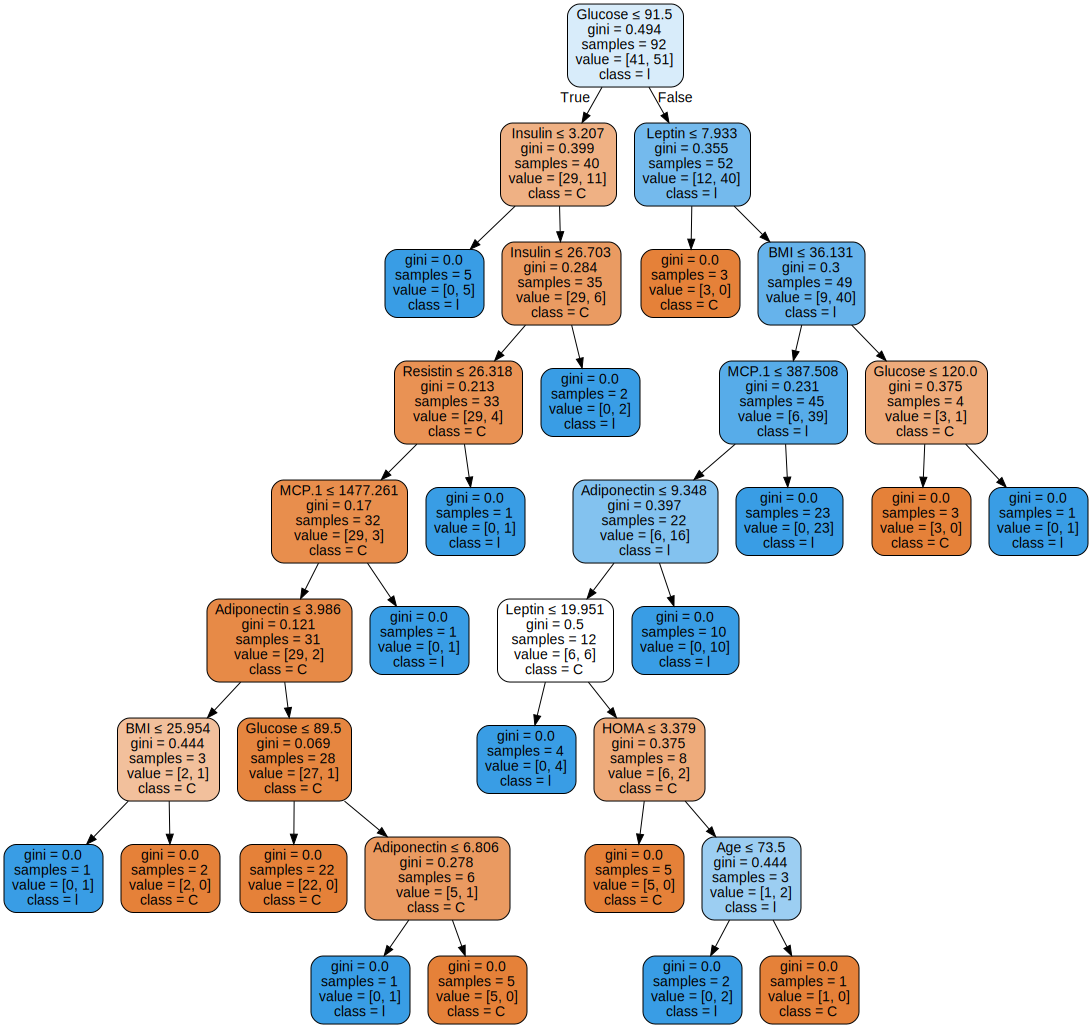

In [ ]:
import graphviz 
dot_data =export_graphviz(d3, out_file=None, feature_names=data.columns[:-1], class_names=data.columns[-1],  filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

In [ ]:
y_predic = d3.predict(x_test)
y_predic

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1])

In [ ]:
data_predic = pd.concat([pd.DataFrame(y_test, columns=["Classifications"]).reset_index(drop=True), pd.DataFrame(y_predic, columns=["Predict"]).reset_index(drop=True)], axis=1)
data_predic

,Classifications,Predict
0,2,1
1,2,1
2,2,2
3,1,1
4,1,1
5,2,2
6,1,1
7,2,1
8,1,1
9,1,2


In [ ]:
correct = data_predic.loc[data_predic["Classifications"] == data_predic["Predict"]]

In [ ]:
from sklearn.metrics import accuracy_score
print(f'acuraty = {"{:,.2f}".format(accuracy_score(y_test, y_predic)*100)}%')
print(f'dari data prediksi {correct.shape[0]} / {data_predic.shape[0]} * 100% = {"{:,.2f}".format((correct.shape[0]) / (data_predic.shape[0]) * 100)}%' )

acuraty = 58.33%
dari data prediksi 14 / 24 * 100% = 58.33%
